In [5]:
import pickle
import numpy as np

def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as file:
        batch = pickle.load(file, encoding='latin1')  # Load a single batch
        data = batch['data']
        labels = batch['labels']
        data = data.reshape(len(data), 3, 32, 32).transpose(0, 2, 3, 1)  # Reshape to (32, 32, 3)
        return data, np.array(labels)

# Load all training batches
train_data = []
train_labels = []

for i in range(1, 6):
    data, labels = load_cifar10_batch(f'/kaggle/input/cifar10/data_batch_{i}')
    train_data.append(data)
    train_labels.append(labels)

train_data = np.concatenate(train_data)
train_labels = np.concatenate(train_labels)

# Load test batch
test_data, test_labels = load_cifar10_batch('/kaggle/input/cifar10/test_batch')


In [6]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [7]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, train_labels, 
          batch_size=64, 
          epochs=20, 
          validation_data=(test_data, test_labels))


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 65ms/step - accuracy: 0.2813 - loss: 2.0899 - val_accuracy: 0.4630 - val_loss: 1.5325
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.4578 - loss: 1.4943 - val_accuracy: 0.5051 - val_loss: 1.3959
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.5268 - loss: 1.3190 - val_accuracy: 0.6267 - val_loss: 1.0718
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.5711 - loss: 1.2168 - val_accuracy: 0.5886 - val_loss: 1.1835
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.5935 - loss: 1.1514 - val_accuracy: 0.6599 - val_loss: 0.9624
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.6189 - loss: 1.0772 - val_accuracy: 0.6604 - val_loss: 0.9793
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.6322 - loss: 1.0556 - val_accuracy: 0.6522 - val_loss: 1.0138
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.6510 - loss: 1.0049 - 

In [18]:
import pandas as pd

# Print the history data
print(model.history.history)


# Convert history to a DataFrame and save as CSV
history_df = pd.DataFrame(model.history.history)
history_df.to_csv('/kaggle/working/cifar10_training_history.csv', index=False)


{}


In [10]:
import pandas as pd

# Load the history from the CSV file
history_df = pd.read_csv('/kaggle/working/cifar10_training_history.csv')

# Display the first few rows
print(history_df.head())


   accuracy      loss  val_accuracy  val_loss
0   0.34858  1.812424        0.4630  1.532545
1   0.47702  1.454377        0.5051  1.395865
2   0.53374  1.305110        0.6267  1.071833
3   0.57332  1.211785        0.5886  1.183492
4   0.59806  1.142897        0.6599  0.962417


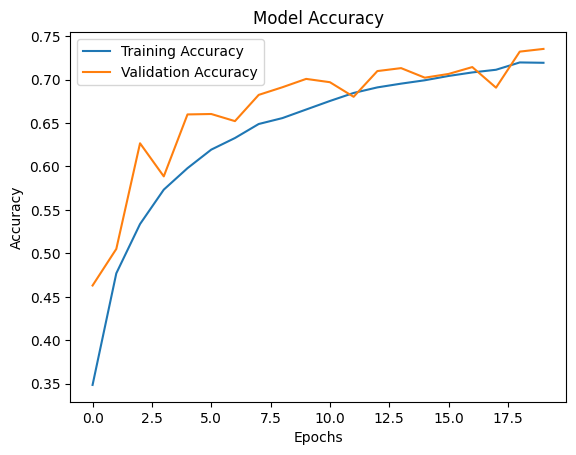

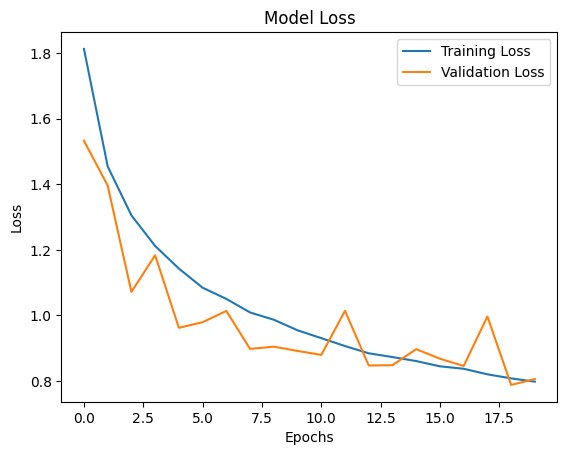

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the image
img = load_img('/kaggle/input/image-of-deer/Screenshot 2024-12-10 033927.png', target_size=(32, 32))  # Resize to 32x32
img_array = img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
prediction = model.predict(img_array)
print(f"Predicted class: {prediction.argmax()}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted class: 4
